#### Salutem, Alec L. COE 005-ECE41S11

## Load data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

ts_train = pd.read_csv('train.csv')
ts_test = pd.read_csv('test.csv')
tsdata = pd.concat([ts_train, ts_test])
tsdata = tsdata.reset_index(drop=True)
display(tsdata)
tsdata.isnull().sum()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Processing the data

In [2]:
import re
import seaborn as sns

{'Survived': {'A': 0.4666666666666667,
  'B': 0.7446808510638298,
  'C': 0.5932203389830508,
  'D': 0.7575757575757576,
  'E': 0.7575757575757576,
  'F': 0.5833333333333334,
  'G': 0.5,
  'T': 0.0}}

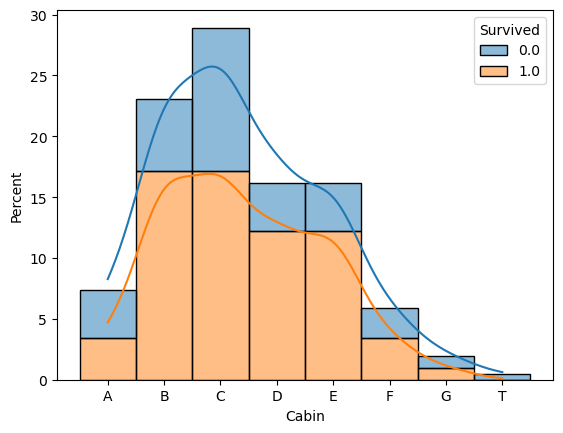

In [3]:
def cabin(x):
    x = re.sub(r'[^A-Z]','',x)
    if len(x)>1:
        x = min(x)
    return x

tempCabin = tsdata[['Survived', 'Cabin']].dropna()

tempCabin['Cabin'] = tempCabin['Cabin'].apply(cabin)

tempCabin= tempCabin.sort_values(by=['Cabin'])
sns.histplot(tempCabin, x = 'Cabin', hue = 'Survived', multiple = 'stack', kde = True, stat = 'percent')
cabin_grpb= tempCabin.groupby('Cabin')
cabin_surv = cabin_grpb.mean()
cabinsurvive = cabin_surv.to_dict(orient = 'dict')
cabinsurvive

In [4]:
def cabin_survival(x):
    x = re.sub(r'[^A-Z]','',x)
    if len(x)>1:
        x = min(x)
    x = cabinsurvive['Survived'][x] # assign cabinsurvive rate from previous data
    return x

tsdata['Cabin'].fillna('G', inplace=True)
tsdata['Cabin_survival']=tsdata['Cabin'].apply(cabin_survival)
tsdata[['Cabin_survival']].head()

,Cabin_survival
0,0.50000
1,0.59322
2,0.50000
3,0.59322
4,0.50000


###### Missing value for Age

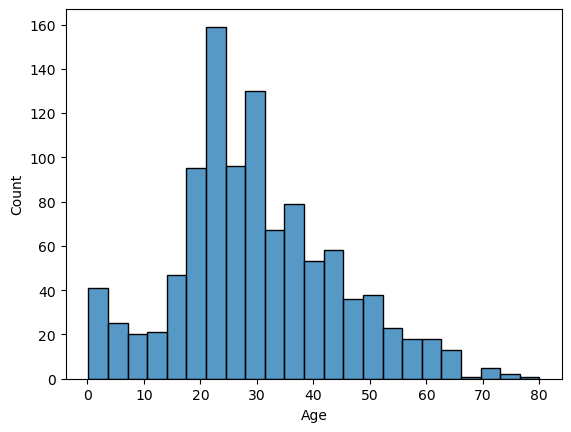

In [5]:
sns.histplot(tsdata, x = 'Age');
tsdata['Age'].fillna(tsdata['Age'].mean(), inplace=True)

In [6]:
tsdata[tsdata['Embarked'].isnull()]
tsdata.dropna(subset=['Embarked'], inplace=True) # removing the rows that contains NULL values.
tsdata.isnull().sum() # returns the number of missing values.

PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin               0
Embarked            0
Cabin_survival      0
dtype: int64

###### Missing value of fare

Filling in Nullvalue of fare.

In [7]:
display(tsdata[tsdata['Fare'].isnull()])

tempFare = tsdata.groupby(['Pclass','Embarked']).mean()
meanfare = tempFare.iloc[8,5]
display(tempFare)
print('Mean Fare for 3rd class and Southampton' ,meanfare)
tsdata['Fare'].fillna(meanfare, inplace=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_survival
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,G,S,0.5


PassengerId  Survived        Age     SibSp     Parch  \
Pclass Embarked                                                         
1      C          700.702128  0.694118  38.215991  0.397163  0.368794   
       Q          654.000000  0.500000  38.000000  1.333333  0.000000   
       S          652.892655  0.582677  37.764574  0.457627  0.372881   
2      C          707.571429  0.529412  24.536591  0.500000  0.428571   
       Q          731.000000  0.666667  43.537468  0.000000  0.000000   
       S          665.681818  0.463415  29.700667  0.392562  0.371901   
3      C          671.940594  0.378788  24.871749  0.376238  0.356436   
       Q          665.115044  0.375000  28.266025  0.336283  0.123894   
       S          628.549495  0.189802  26.145796  0.660606  0.472727   

                       Fare  Cabin_survival  
Pclass Embarked                              
1      C         106.845330        0.629360  
       Q          90.000000        0.593220  
       S          72.148094        0.632687  
2      C          23.300593        0.536797  
       Q          11.735114        0.536797  
       S          21.206921        0.509798  
3      C          11.021624        0.507651  
       Q          10.390820        0.500737  
       S          14.435422        0.502234

Mean Fare for 3rd class and Southampton 14.435422064777327


###### Removing Outliers

In [8]:
import numpy as np 

def rmv_ol(tsdata, col, cond):
    Q3 = np.quantile(tsdata[cond][col], 0.75)
    Q1 = np.quantile(tsdata[cond][col], 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    Q2 = np.mean(tsdata[cond][col])

    print(f'IQR value for {col} is {IQR}')
    print(f'Lower range is {lower_range}')
    print(f'Upper range is {upper_range}')
    print(f'Mean is {Q2}')

    cond2 = (tsdata[col] < lower_range)
    cond3 = (tsdata[col] > upper_range)

    outliers_cond = (cond&cond3)|(cond&cond3)
    outlier_id = tsdata[outliers_cond]['PassengerId'].to_list()
    print('PassengerIds with outliers',outlier_id)
    print()
    tsdata.loc[outlier_id,col]=Q2
    return

rmv_ol(tsdata, 'Fare', (tsdata['Pclass']==1))
rmv_ol(tsdata, 'Fare', (tsdata['Pclass']==2))
rmv_ol(tsdata, 'Fare', (tsdata['Pclass']==3))


IQR value for Fare is 78.20420000000001
Lower range is -86.61050000000003
Upper range is 226.20630000000003
Mean is 87.55577663551402
PassengerIds with outliers [28, 89, 119, 259, 300, 312, 342, 381, 439, 558, 680, 701, 717, 738, 743, 916, 945, 951, 956, 961, 1034, 1076, 1094, 1235, 1267]

IQR value for Fare is 13.25
Lower range is -6.875
Upper range is 46.125
Mean is 23.65204319983805
PassengerIds with outliers [73, 121, 260, 313, 343, 386, 440, 616, 656, 666, 718, 755, 946, 957, 1035, 1077, 1095, 1104, 1122, 1244, 1245, 1277]

IQR value for Fare is 7.800000000000001
Lower range is -3.950000000000001
Upper range is 27.25
Mean is 14.824531363504255
PassengerIds with outliers [14, 17, 26, 29, 51, 60, 64, 72, 75, 87, 90, 120, 148, 160, 165, 168, 170, 172, 181, 183, 202, 234, 262, 267, 279, 301, 325, 361, 382, 437, 481, 510, 542, 543, 611, 635, 639, 643, 644, 679, 681, 684, 687, 693, 737, 739, 744, 788, 793, 814, 820, 825, 827, 839, 847, 851, 864, 886, 917, 931, 952, 962, 1031, 1032, 1046

In [9]:
cl_tsdata = tsdata.drop(['PassengerId','Ticket','Name','Cabin','SibSp','Parch'],axis = 1)
cl_tsdata.reset_index(drop = True, inplace=True)
cl_tsdata

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_survival
0,0.0,3,male,22.000000,7.2500,S,0.50000
1,1.0,1,female,38.000000,71.2833,C,0.59322
2,1.0,3,female,26.000000,7.9250,S,0.50000
3,1.0,1,female,35.000000,53.1000,S,0.59322
4,0.0,3,male,35.000000,8.0500,S,0.50000
...,...,...,...,...,...,...,...
1302,NaN,3,male,29.881138,8.0500,S,0.50000
1303,NaN,1,female,39.000000,108.9000,C,0.59322
1304,NaN,3,male,38.500000,7.2500,S,0.50000
1305,NaN,3,male,29.881138,8.0500,S,0.50000


In [10]:
training_set = cl_tsdata['Survived'].isnull()==False 
trn_tsdata = cl_tsdata[training_set]
trn_tsdata['Survived'] = trn_tsdata['Survived'].astype(int)
print('Train data')
display(trn_tsdata)


testing_set = cl_tsdata['Survived'].isnull()
test_tsdata = cl_tsdata[testing_set]
test_tsdata = test_tsdata.drop('Survived', axis = 1)
print('Test data')
ts_test

Train data


,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_survival
0,0,3,male,22.000000,7.250000,S,0.500000
1,1,1,female,38.000000,71.283300,C,0.593220
2,1,3,female,26.000000,7.925000,S,0.500000
3,1,1,female,35.000000,53.100000,S,0.593220
4,0,3,male,35.000000,8.050000,S,0.500000
...,...,...,...,...,...,...,...
884,0,2,male,27.000000,14.824531,S,0.500000
885,1,1,female,19.000000,30.000000,S,0.744681
886,0,3,female,29.881138,23.450000,S,0.500000
887,1,1,male,26.000000,30.000000,C,0.593220


Test data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
trn_tsdata

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_survival
0,0,3,male,22.000000,7.250000,S,0.500000
1,1,1,female,38.000000,71.283300,C,0.593220
2,1,3,female,26.000000,7.925000,S,0.500000
3,1,1,female,35.000000,53.100000,S,0.593220
4,0,3,male,35.000000,8.050000,S,0.500000
...,...,...,...,...,...,...,...
884,0,2,male,27.000000,14.824531,S,0.500000
885,1,1,female,19.000000,30.000000,S,0.744681
886,0,3,female,29.881138,23.450000,S,0.500000
887,1,1,male,26.000000,30.000000,C,0.593220


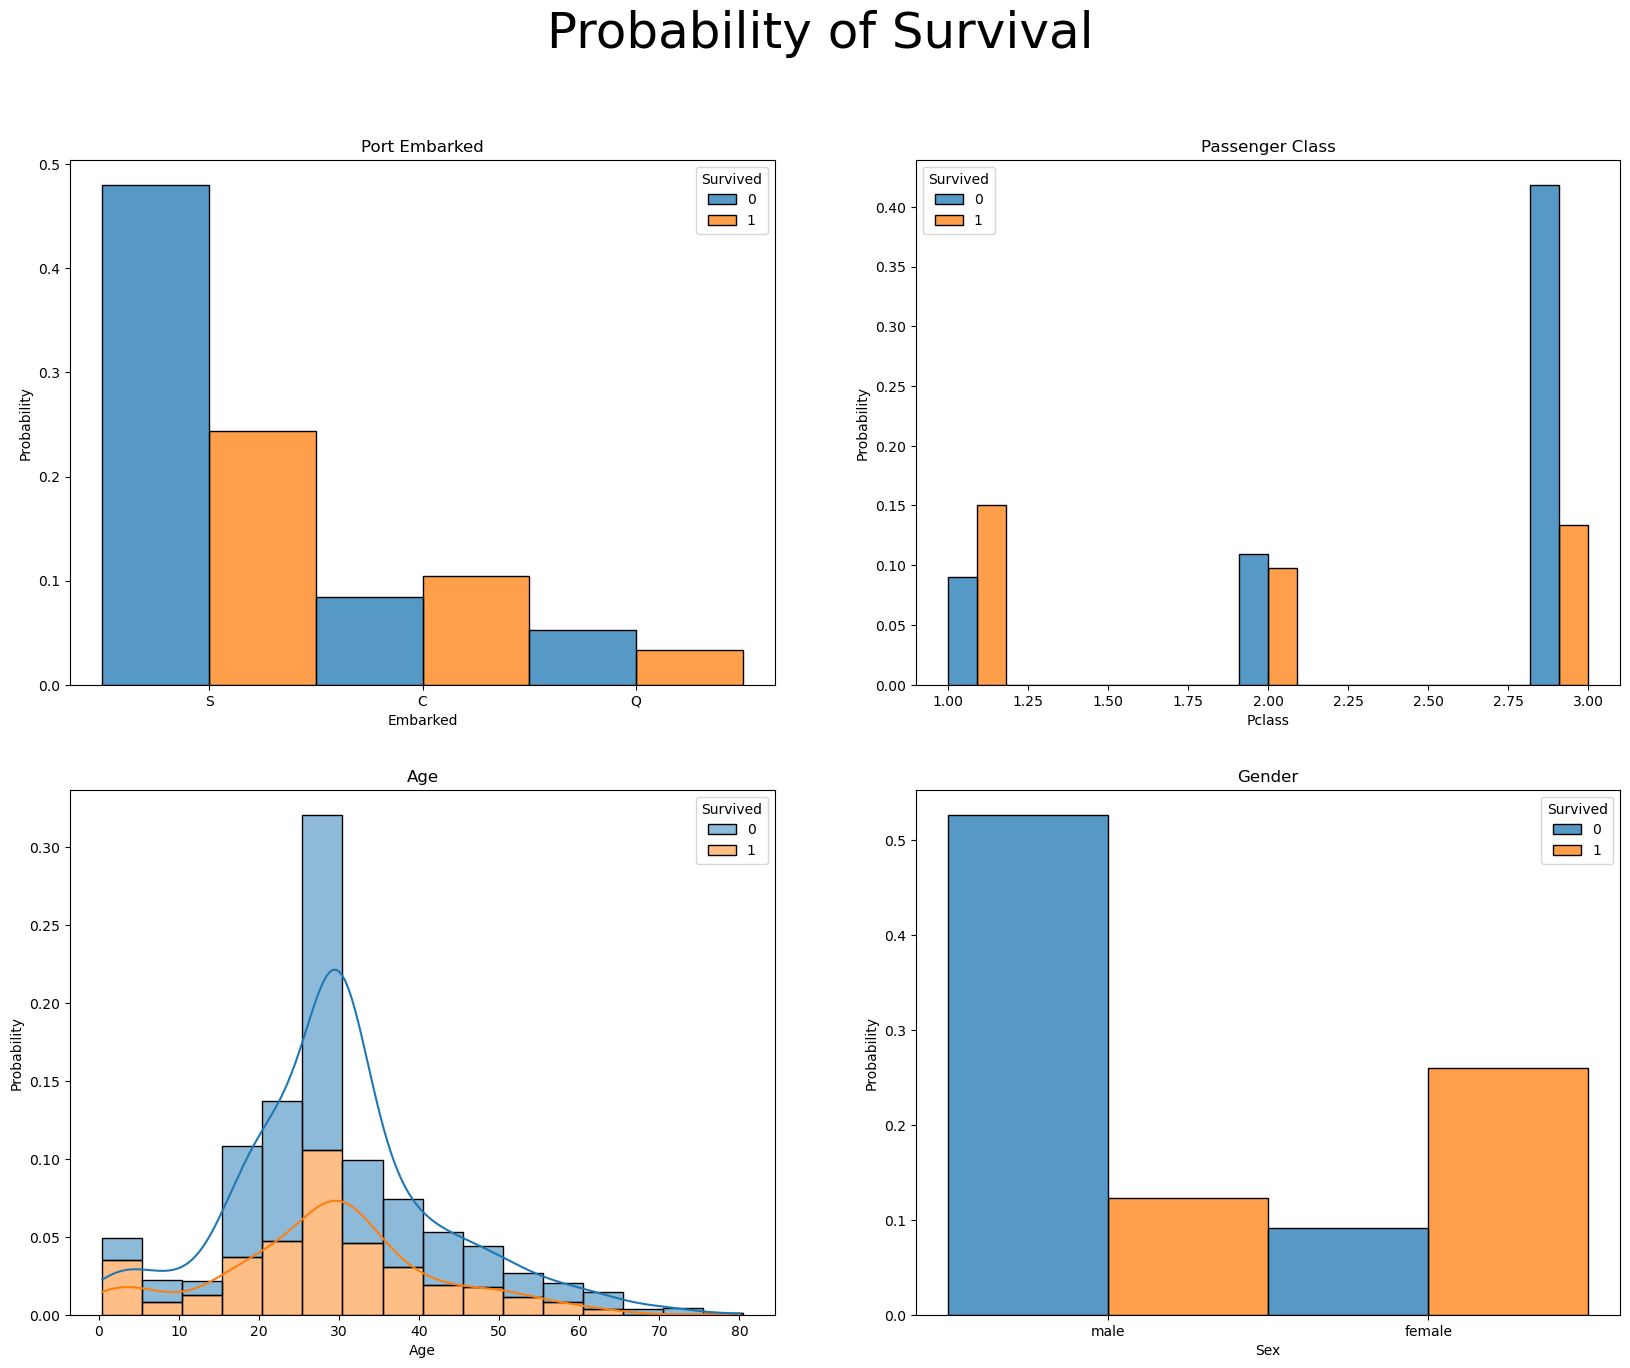

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,15))
plt.suptitle("Probability of Survival", fontsize = 36)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.title.set_text('Port Embarked')
sns.histplot(trn_tsdata, x='Embarked', hue = 'Survived', multiple = 'dodge', stat='probability', ax = ax1)

ax2.title.set_text('Passenger Class')
sns.histplot(trn_tsdata, x = 'Pclass', hue = 'Survived', multiple = 'dodge', stat='probability', ax = ax2)

ax3.title.set_text('Age')
sns.histplot(trn_tsdata, x = 'Age', hue = 'Survived', multiple = 'stack', binwidth = 5, kde=True, stat='probability', ax = ax3)

ax4.title.set_text('Gender')
sns.histplot(trn_tsdata, x = 'Sex', hue = 'Survived', multiple = 'dodge', stat='probability', ax = ax4)
plt.show()

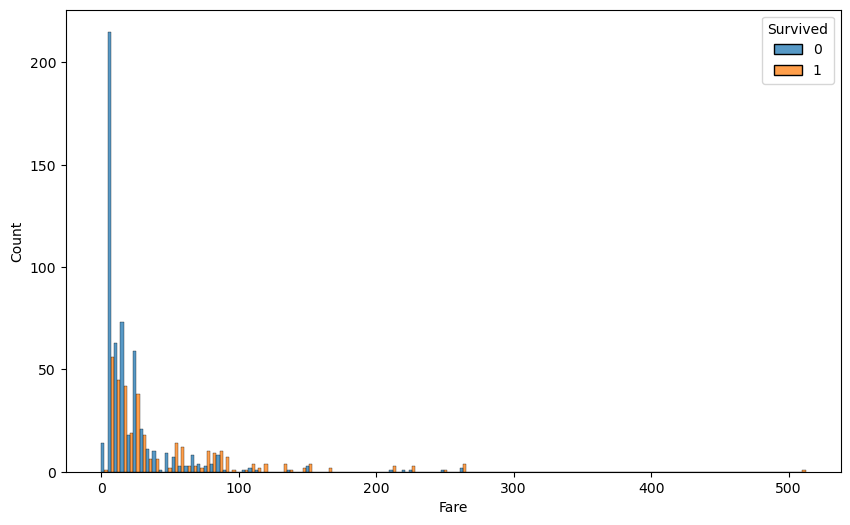

In [13]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data=trn_tsdata, x="Fare", hue="Survived", multiple = 'dodge')
plt.show()

##### Choosing best class

In [14]:
trn_tsdata

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_survival
0,0,3,male,22.000000,7.250000,S,0.500000
1,1,1,female,38.000000,71.283300,C,0.593220
2,1,3,female,26.000000,7.925000,S,0.500000
3,1,1,female,35.000000,53.100000,S,0.593220
4,0,3,male,35.000000,8.050000,S,0.500000
...,...,...,...,...,...,...,...
884,0,2,male,27.000000,14.824531,S,0.500000
885,1,1,female,19.000000,30.000000,S,0.744681
886,0,3,female,29.881138,23.450000,S,0.500000
887,1,1,male,26.000000,30.000000,C,0.593220


In [15]:
w=trn_tsdata[trn_tsdata['Sex']=='female']['Survived']
wp = w.sum()/len(w)

print("% of men who survived:", wp)

% of men who survived: 0.7403846153846154


In [16]:
m=trn_tsdata[trn_tsdata['Sex']=='male']['Survived']
mp = m.sum()/len(m)

print("% of men who survived:", mp)

% of men who survived: 0.18890814558058924


### Separating X & Y

In [17]:
from sklearn.ensemble import RandomForestClassifier

y = trn_tsdata["Survived"]

features = ["Pclass", "Sex", "Embarked", "Age"]
X = pd.get_dummies(trn_tsdata[features])
X_test = pd.get_dummies(trn_tsdata[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

### Appling algorithms

In [18]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X, y)
logr.score(X, y)

0.7896512935883014

In [19]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X, y)
forest.score(X, y)

0.889763779527559

In [20]:
trn_tsdata

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_survival
0,0,3,male,22.000000,7.250000,S,0.500000
1,1,1,female,38.000000,71.283300,C,0.593220
2,1,3,female,26.000000,7.925000,S,0.500000
3,1,1,female,35.000000,53.100000,S,0.593220
4,0,3,male,35.000000,8.050000,S,0.500000
...,...,...,...,...,...,...,...
884,0,2,male,27.000000,14.824531,S,0.500000
885,1,1,female,19.000000,30.000000,S,0.744681
886,0,3,female,29.881138,23.450000,S,0.500000
887,1,1,male,26.000000,30.000000,C,0.593220


In [21]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
corpus = []
for i in range(0, len(trn_tsdata)):
    review = re.sub('[^a-zA-Z]', ' ',trn_tsdata['Sex'][i]) # [^a-zA-Z] means any character not in capital as well as small a-z will be replaced by blank space
    review = review.lower()
    review = review.split()

    
    
    
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y = pd.get_dummies(trn_tsdata['Survived'])
y = y.iloc[:, 1].values

# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [23]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(5000,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [24]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
mod = model.fit(X_train, y_train,epochs=1,batch_size=512,verbose=1)

result = model.evaluate(X_train, y_train)
print(result)

25/25 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.6200
[0.6918639540672302, 0.6200000047683716]


In [26]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

In [27]:
print("Testing Loss {:.4f}".format(loss))
print("Testing Accuracy {:.4f}".format(accuracy))


Testing Loss 0.6921
Testing Accuracy 0.5955


#### Comparson 
###### Logistic regression is used to solve problems because it is easy to use, doesn't give discrete results, and gives probabilities for each possible outcome. Random Forest Classifier is an algorithm that focuses on accuracy and gains weight if it is not used correctly.

#### Analysis
###### In general, it's not quite clear why the Random Forest Classifier is superior than logistic regression and numeric measures when it comes to categorical data. Random Forest Classifier performs better on datasets with more Categorical data and outliers.

#### Conclusion
###### To conclude that the accuracy of predictions from logistic regression and random forest are related Random Forest did a little better on the datasets that were looked at, but the difference is not statistically important. The metadata that was looked at doesn't seem to have much of an effect on how well either model predicts.